<h1>Activity 1 (Finals) : Dengue</h1>
<hr>
<h1> Analysis: Ron Jerick T. Gamba</h1>


In [24]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

<h1>Reading Data</h1>
<hr>

In [25]:
dengue = pd.read_csv("datasets/dengue.csv")
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Describing Data</h1>
<hr>


In [26]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [27]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [28]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [29]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


In [37]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [38]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   object  
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 33.4+ KB


<h1>Data Visualizations Using SNS </h1>
<hr>

<h1>Which months have the most Dengue cases each year?</h1>

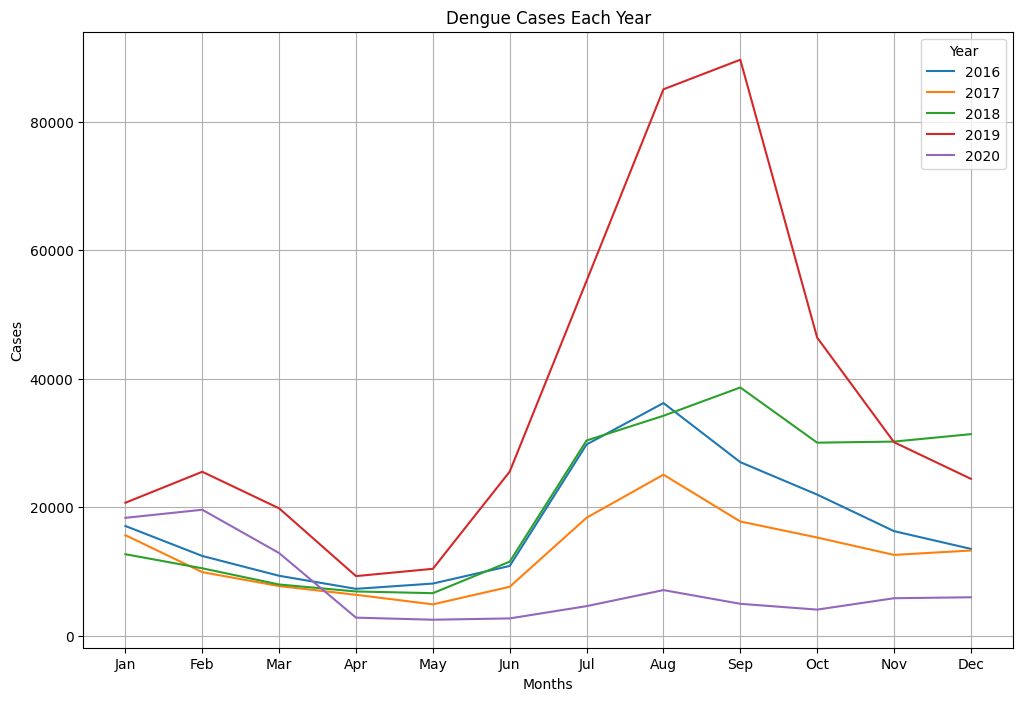

In [47]:
monthly_cases = dengue.groupby(["Month", "Year"])["Dengue_Cases"].sum()
monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.title("Dengue Cases Each Year")
plt.xlabel("Months")
plt.ylabel("Cases")
plt.xticks(range(0,12), month_order)
plt.show()

# Insights
## Base on the line plot year 2019 have the most cases in other year, month-by-month across different years, making it easy to spot seasonal peaks.